You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. 

You have been given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables.

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


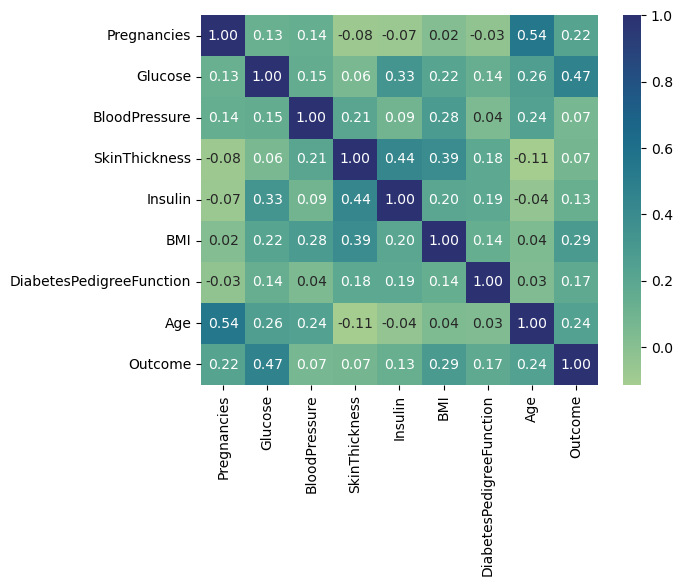

In [6]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="crest")
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


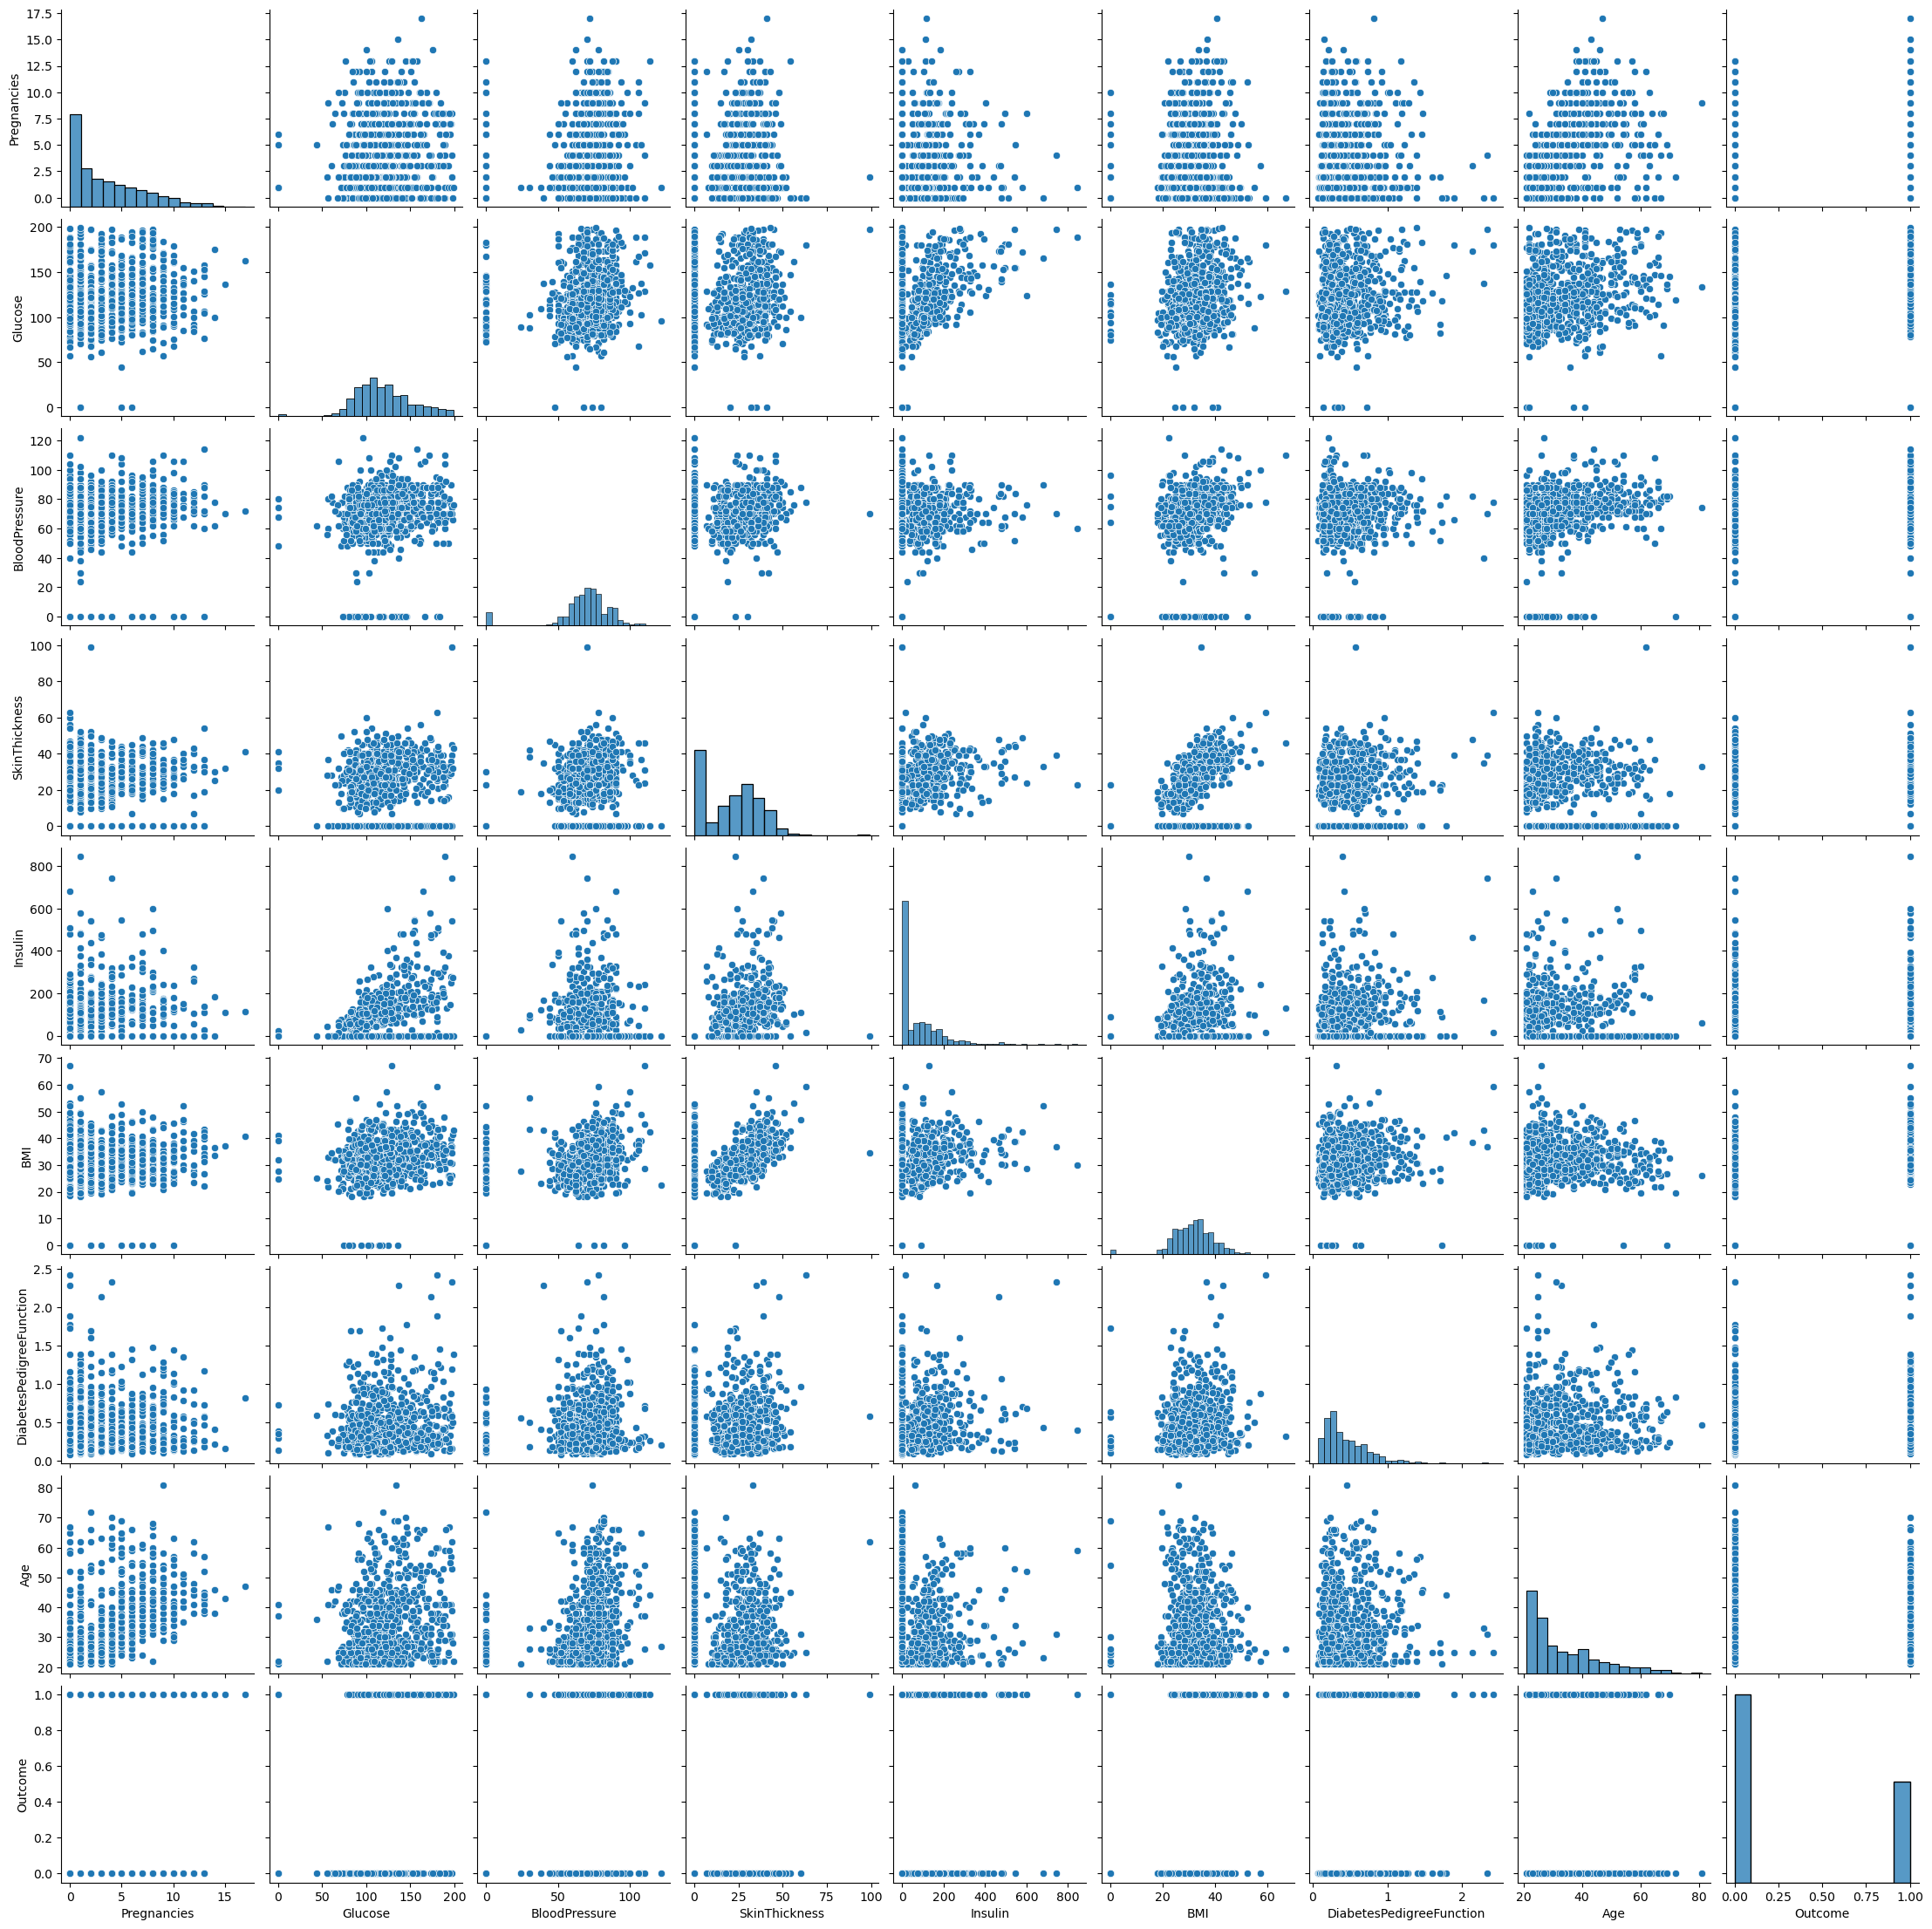

In [8]:
sns.pairplot(df)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

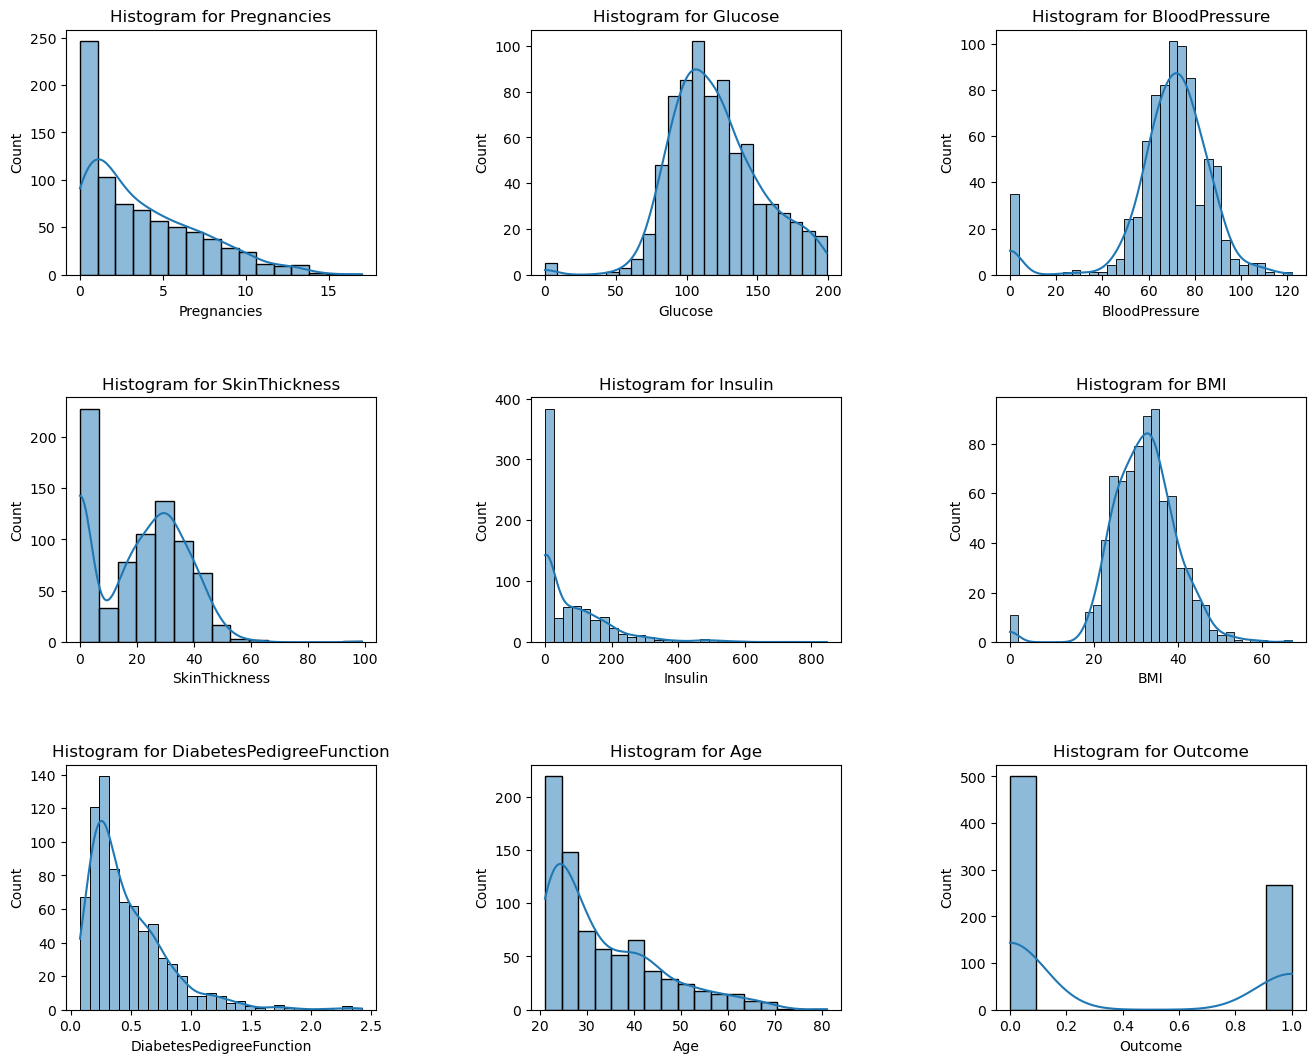

In [10]:
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

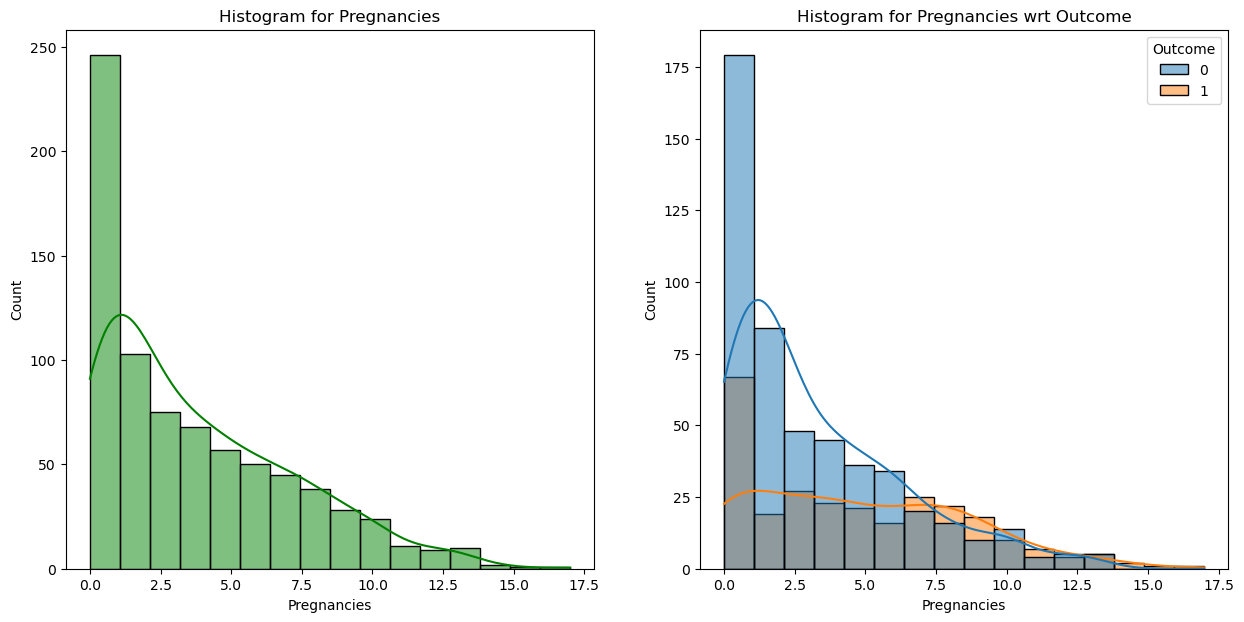

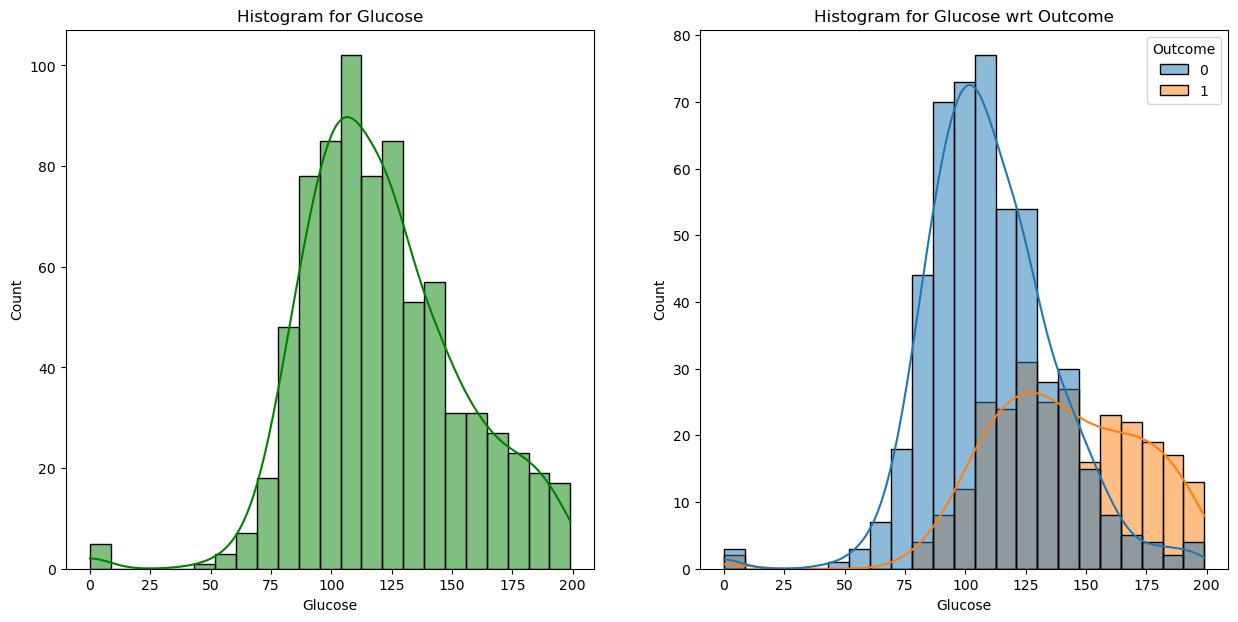

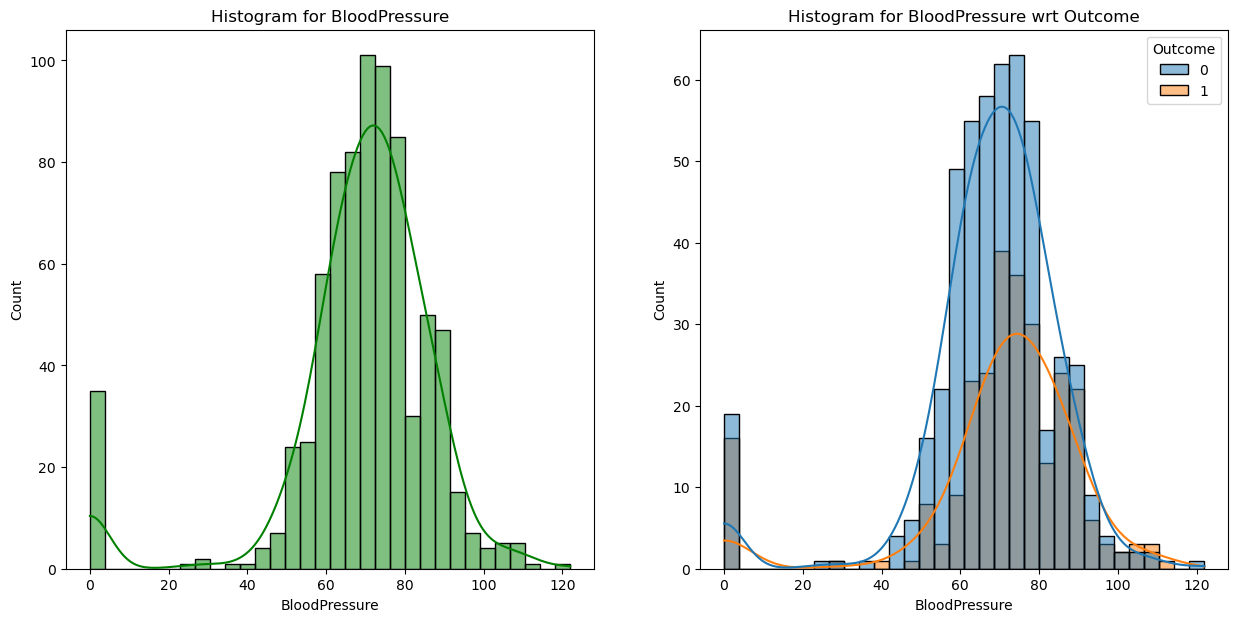

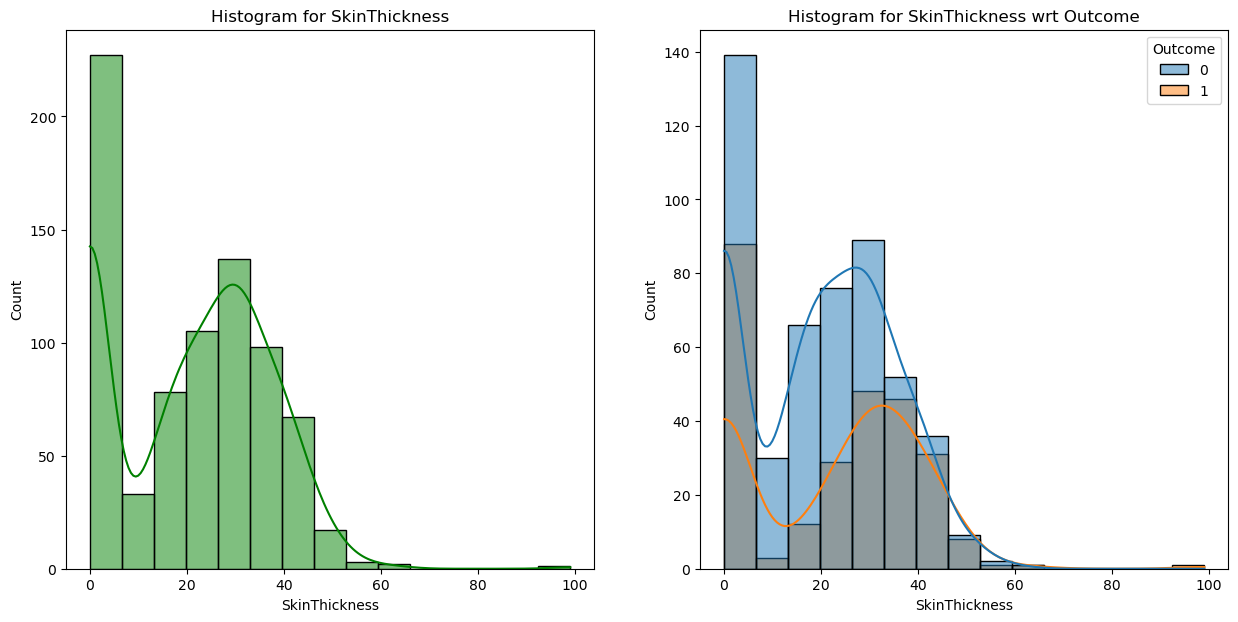

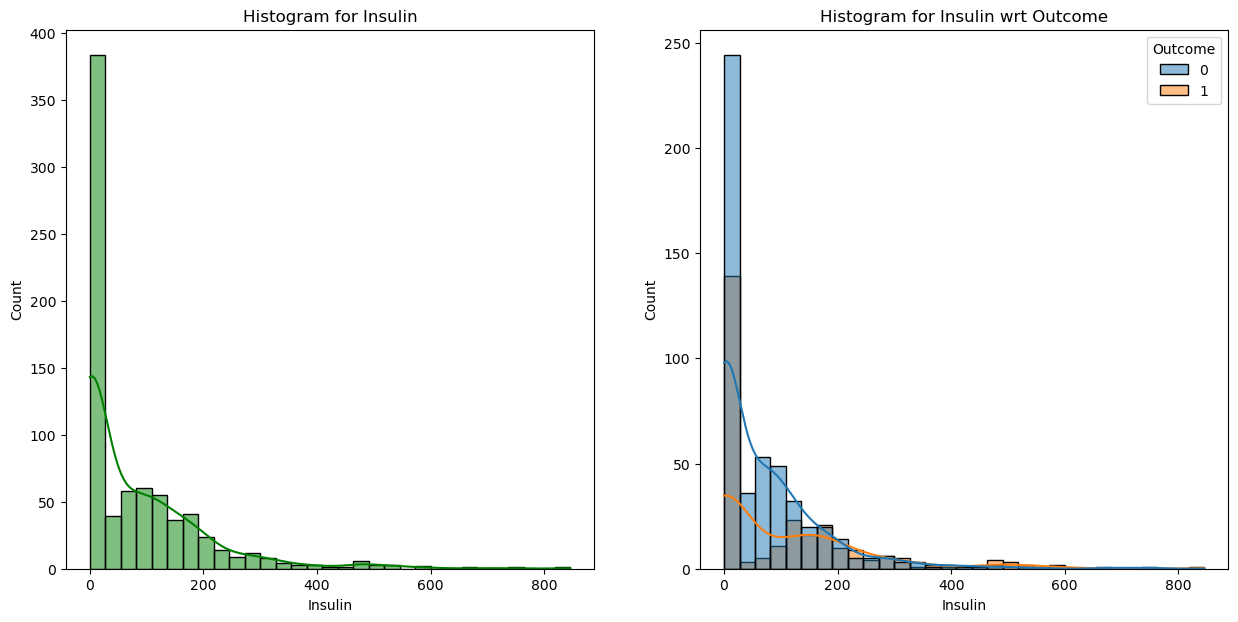

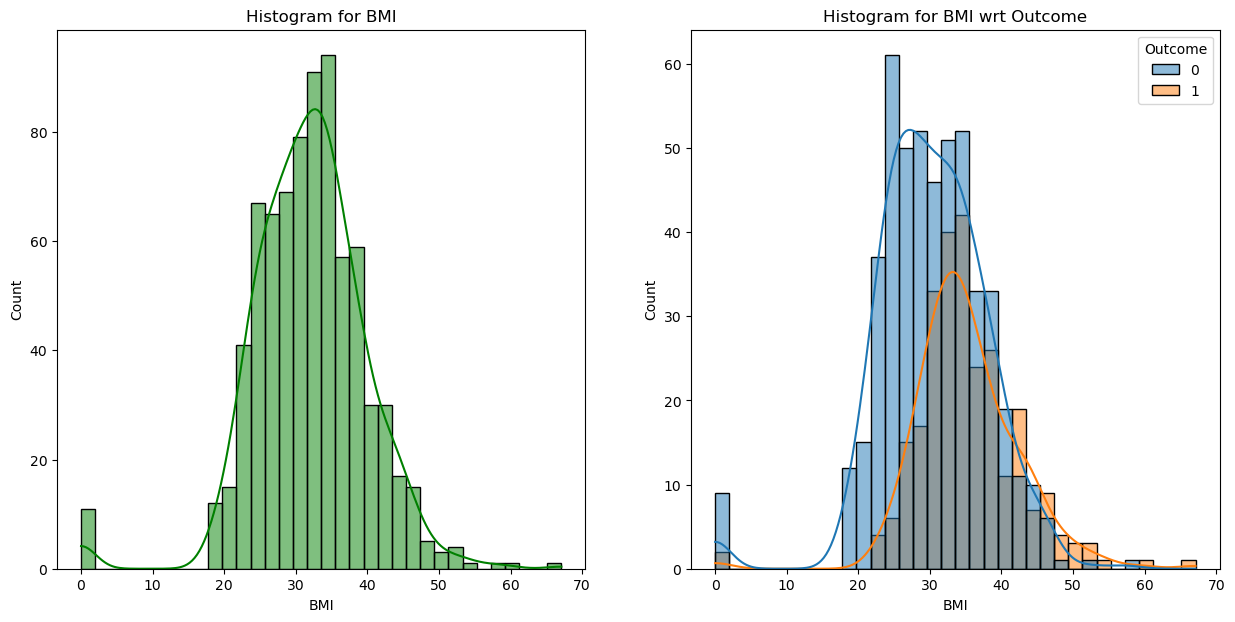

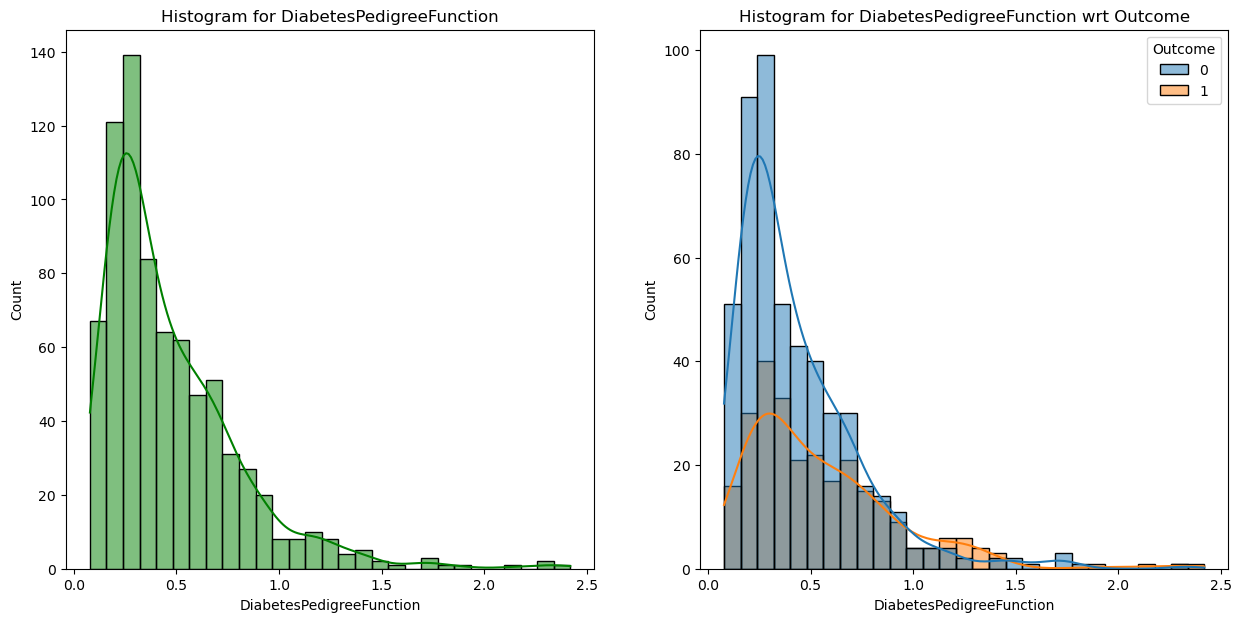

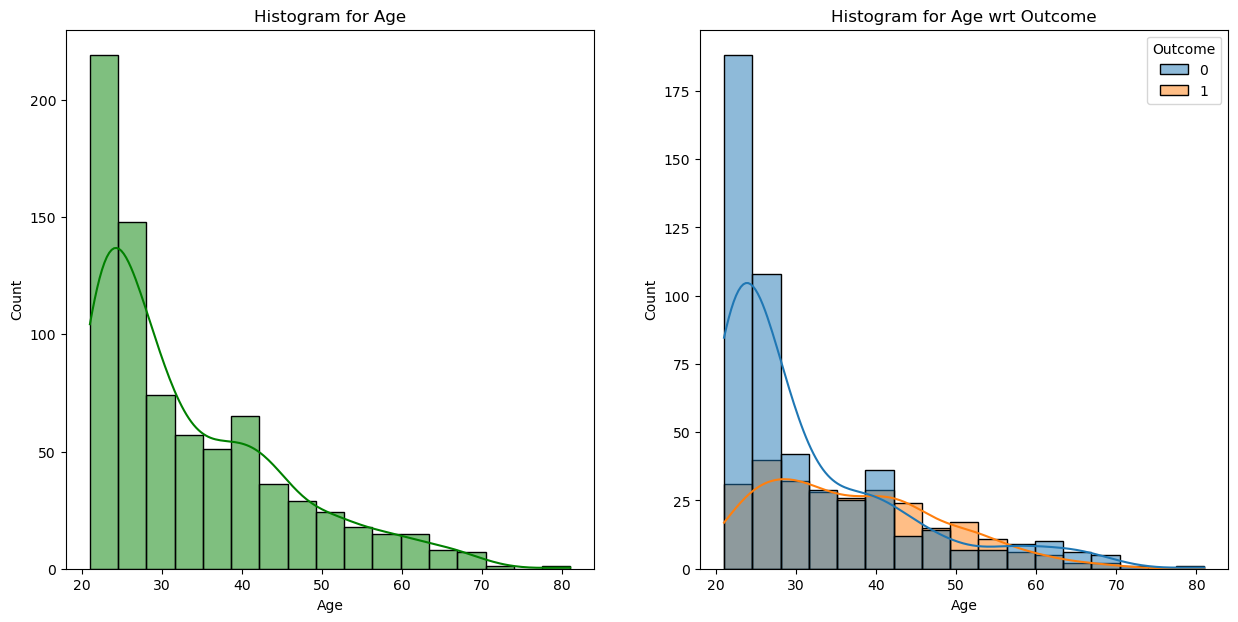

In [11]:
# Univariate Analysis with respect to Outcome column
for i in df.columns:
    if i != 'Outcome':
        fig, ax = plt.subplots(1,2,figsize=(15,7))
        plt.subplot(121)
        sns.histplot(data=df,x=i,kde=True,bins='fd',color='g')
        plt.title(f'Histogram for {i}')
        plt.subplot(122)
        sns.histplot(data=df,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()

Observation 
- There is imbalance in the outcome column for class 0 --> 500 values and for class 1 --> 268
- There are 0 as values in various columns as in the above histogram we will replace them with median
- Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction these columns 0 values will be replaced with their respective column medians

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [12]:
cols_zero_val = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [13]:
for i in cols_zero_val:    
    print(f'{i} : {len(df[df[i]==0])}')

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [14]:
for i in cols_zero_val:
    df[i] = df[i].replace(0,df[i].median())

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

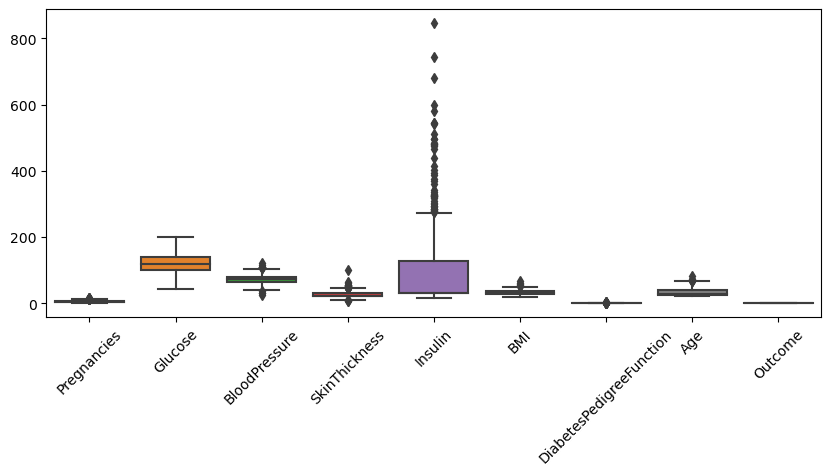

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

- There are outliers but its not necessary to remove them as the Descision Tree Algorithm is not sensitive to outliers

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
#Dependent and independent features
X = df.iloc[:,:-1]
y = df["Outcome"]

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.33)

In [23]:
X_train.shape , X_test.shape

((514, 8), (254, 8))

In [24]:
y_train.shape , y_test.shape

((514,), (254,))

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [25]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,15)),
    'max_features':['sqrt','log2']
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameters,cv=5,scoring = 'accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [28]:
clf.best_score_

0.7510755758614126

In [29]:
model = DecisionTreeClassifier(**clf.best_params_)

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', splitter='random')

In [31]:
y_pred=model.predict(X_test)

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [32]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [34]:
acc_test = accuracy_score(y_pred,y_test)
print(f'Accuracy Score for test data is {acc_test}')

Accuracy Score for test data is 0.7007874015748031


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       203
           1       0.37      0.73      0.49        51

    accuracy                           0.70       254
   macro avg       0.64      0.71      0.64       254
weighted avg       0.80      0.70      0.73       254



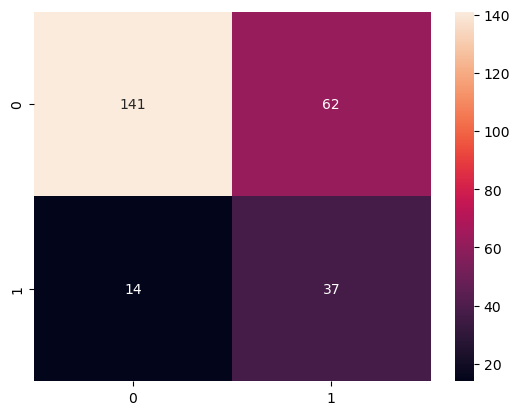

In [36]:
cf = confusion_matrix(y_pred, y_test)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

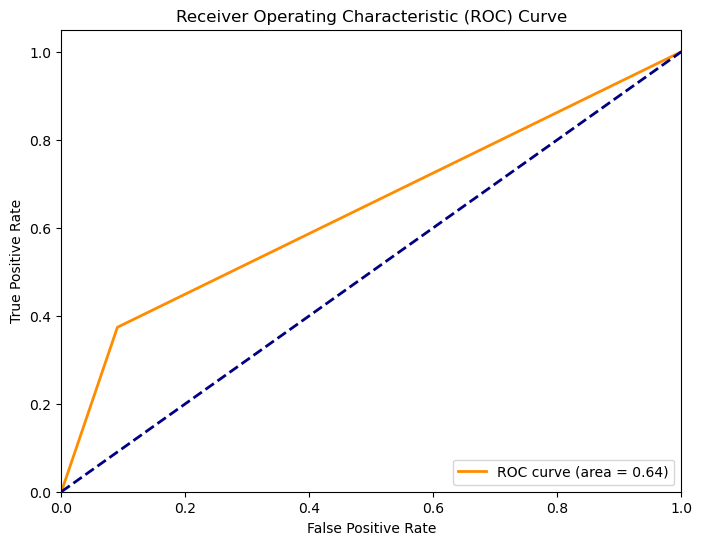

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming you have true labels (y_test) and predicted probabilities (y_pred) for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

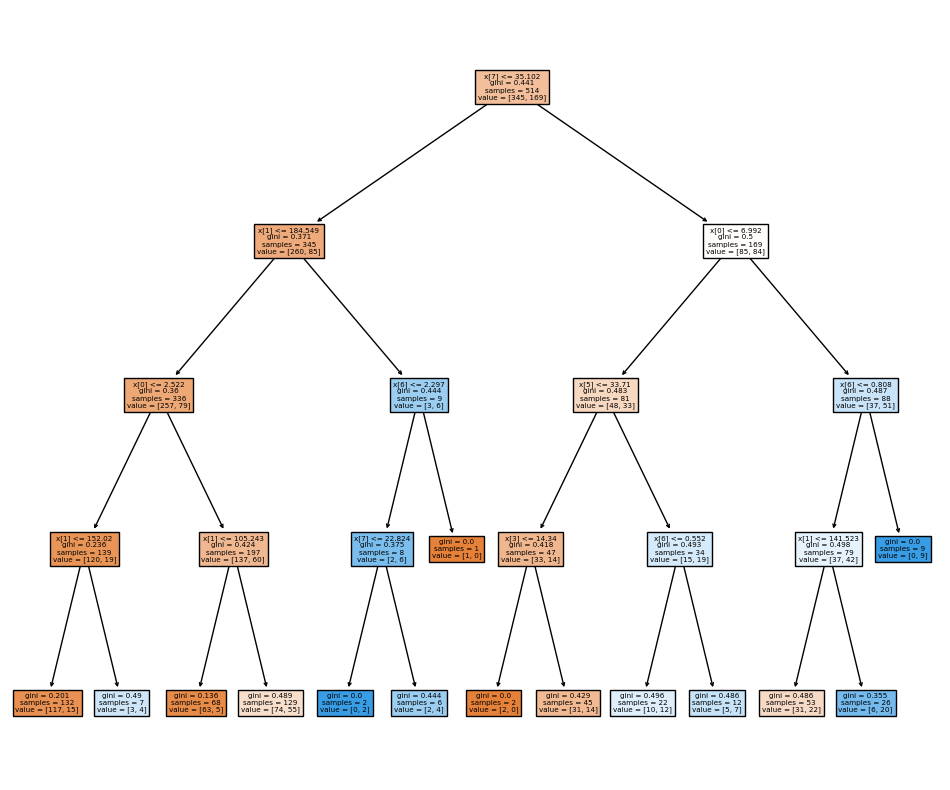

In [38]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)
plt.show()

In [39]:
model.feature_importances_

array([0.13958056, 0.42332273, 0.        , 0.00729435, 0.        ,
       0.05287148, 0.08986698, 0.28706389])

In [40]:
imp = model.feature_importances_
imp = pd.Series(imp)
imp.index = X_train.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.423323
Age                         0.287064
Pregnancies                 0.139581
DiabetesPedigreeFunction    0.089867
BMI                         0.052871
SkinThickness               0.007294
BloodPressure               0.000000
Insulin                     0.000000
dtype: float64

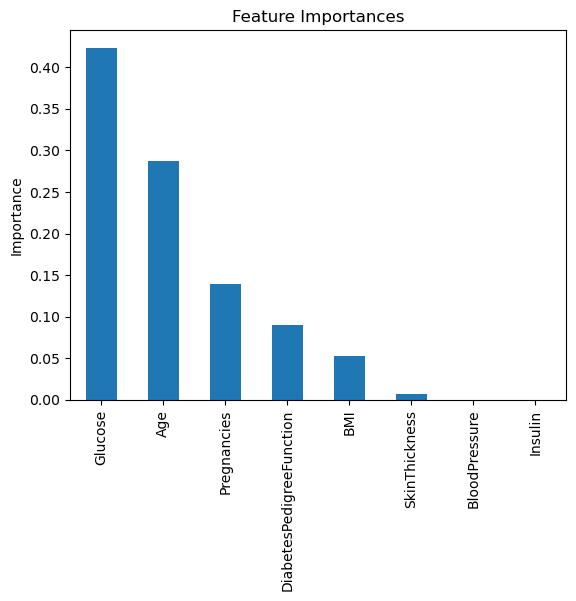

In [41]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')
plt.show()

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
new_data = [6,120,22,35,120,18.4,0.90,45]

In [50]:
y_pred = model.predict([new_data])

In [51]:
y_pred[0]

0

In [52]:
if y_pred[0] == 1:
    print("Diabetic")
else :
    print("Not Diabetic")

Not Diabetic
